Graded Challange 2 <br>
Nama : Risqi Wahyu Permana <br>
Batch : HCK 6

# Objective

- Mampu memperoleh data menggunakan BigQuery
- Mampu melakukan pemrosesan data sebelum melakukan perhitungan
- Mampu menerapkan konsep statistics descriptive dan inferential pada suatu permasalahan
- Mampu memahami konsep statistics descriptive dan inferential

# Working Area

#### Query yang dipakai di Google Cloud Platform
```sql
SELECT report_date,load_time, load_type, load_weight, dropoff_site
FROM `bigquery-public-data.austin_waste.waste_and_diversion`
WHERE report_date BETWEEN '2021-01-01' AND '2021-07-09'
ORDER BY report_date
```

#### Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

#### Load dataset

In [2]:
df = pd.read_csv('h8dsft_P0GC2_Risqi_Wahyu_Permana.csv')
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF


In [3]:
#change report_date data type to datetime
df['report_date'] = pd.to_datetime(df['report_date'])

In [4]:
df.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL
26156,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,3040.0,TDS LANDFILL


## Menyelesaikan Problem

### Problem 1

#### 1. Mengecek dan menghilangkan missing value

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   report_date   26157 non-null  datetime64[ns]
 1   load_time     26157 non-null  object        
 2   load_type     26157 non-null  object        
 3   load_weight   25109 non-null  float64       
 4   dropoff_site  26157 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1021.9+ KB


In [6]:
#check missing value
df.isnull().sum()

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64

- Terdapat missing value pada kolom load_weight

- Ganti missing value dengan median
```
Penggunaan median membantu mengurangi bias, karena median mencermikan pusat data. Sehingga lebih stabil dalam memberikan perkiraan.
```

In [7]:
#change missing values to median
df['load_weight'].fillna(df['load_weight'].median(), inplace=True)

In [8]:
#check duplicate
df.duplicated().sum()

445

In [9]:
#drop duplicate
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25712 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   report_date   25712 non-null  datetime64[ns]
 1   load_time     25712 non-null  object        
 2   load_type     25712 non-null  object        
 3   load_weight   25712 non-null  float64       
 4   dropoff_site  25712 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.2+ MB


In [11]:
#check missing value
df.isnull().sum()

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

#### 2. Eksplorasi data sederhana

In [12]:
#range date of data
print('Rentang waktu pengambilan data dari', df['report_date'].dt.date.min(), 'sampai',df['report_date'].dt.date.max())


Rentang waktu pengambilan data dari 2021-01-01 sampai 2021-07-09


In [13]:
#unique values
df['load_type'].unique()

array(['SWEEPING', 'TIRES', 'RECYCLING - SINGLE STREAM', 'YARD TRIMMING',
       'BULK', 'DEAD ANIMAL', 'GARBAGE COLLECTIONS', 'MIXED LITTER',
       'ORGANICS', 'BRUSH', 'RECYCLED METAL', 'LITTER',
       'CONTAMINATED RECYCLING', 'CONTAMINATED ORGANICS'], dtype=object)

In [14]:
df['dropoff_site'].unique()

array(['ONION CREEK', 'MRF', 'TDS - MRF', 'HORNSBY BEND', 'TDS LANDFILL',
       'ORGANICS BY GOSH', 'BALCONES RECYCLING', 'AUSTIN IRON AND METAL',
       'PARK CENTER', 'ON ROUTE HIGH DUMP', 'WILCAB', 'GREAT NORTHERN',
       'AUSTIN WOOD RECYCLING', 'PARK BEND', 'BALCONES WOODS',
       'STEINER LANDFILL', 'WESTFIELD', 'ST. EDWARDS'], dtype=object)

#### 3. Central Tedency

In [15]:
#central tendency of each dropoff_site
df.groupby('dropoff_site').mean(numeric_only=True)

,load_weight
dropoff_site,
AUSTIN IRON AND METAL,451.200000
AUSTIN WOOD RECYCLING,4050.000000
BALCONES RECYCLING,9464.934760
BALCONES WOODS,8460.000000
GREAT NORTHERN,11982.898551
HORNSBY BEND,6645.112053
MRF,1799.982143
ON ROUTE HIGH DUMP,11405.925926
ONION CREEK,11300.000000


In [16]:
#the bigest mean of load_weight show with dropoff_site
df.groupby('dropoff_site').mean(numeric_only=True).sort_values(by='load_weight', ascending=False).head(1)

,load_weight
dropoff_site,
WESTFIELD,16020.0


In [17]:
df.groupby('dropoff_site').median()

/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_74397/98623448.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('dropoff_site').median()


,load_weight
dropoff_site,
AUSTIN IRON AND METAL,400.0
AUSTIN WOOD RECYCLING,4050.0
BALCONES RECYCLING,9840.0
BALCONES WOODS,8460.0
GREAT NORTHERN,11300.0
HORNSBY BEND,6420.0
MRF,1360.0
ON ROUTE HIGH DUMP,11300.0
ONION CREEK,11300.0


In [18]:
#the bigest median of load_weight show with dropoff_site
df.groupby('dropoff_site').median(numeric_only=True).sort_values(by='load_weight', ascending=False).head(1)

,load_weight
dropoff_site,
WESTFIELD,16020.0


In [19]:
#mode
df.groupby('dropoff_site').agg(lambda x: x.value_counts().index[0])

,report_date,load_time,load_type,load_weight
dropoff_site,,,,
AUSTIN IRON AND METAL,2021-01-05,2021-01-05 11:00:00 UTC,RECYCLED METAL,260.0
AUSTIN WOOD RECYCLING,2021-02-03,2021-02-03 02:05:00 UTC,RECYCLING - SINGLE STREAM,2340.0
BALCONES RECYCLING,2021-03-04,2021-03-05 12:00:00 UTC,RECYCLING - SINGLE STREAM,11880.0
BALCONES WOODS,2021-04-09,2021-04-09 12:00:00 UTC,RECYCLING - SINGLE STREAM,8460.0
GREAT NORTHERN,2021-03-15,2021-02-02 04:42:00 UTC,SWEEPING,11300.0
HORNSBY BEND,2021-02-25,2021-01-27 12:00:00 UTC,BRUSH,5500.0
MRF,2021-07-08,2021-01-12 12:00:00 UTC,TIRES,960.0
ON ROUTE HIGH DUMP,2021-02-10,2021-01-14 10:35:00 UTC,SWEEPING,11300.0
ONION CREEK,2021-03-09,2021-04-30 12:00:00 UTC,SWEEPING,11300.0


In [20]:
#mode of load type each dropoff_site and count of most occurrences
df.groupby('dropoff_site')['load_type'].agg(lambda x: x.value_counts().index[0]).value_counts()

SWEEPING                     6
RECYCLING - SINGLE STREAM    4
GARBAGE COLLECTIONS          3
ORGANICS                     2
RECYCLED METAL               1
BRUSH                        1
TIRES                        1
Name: load_type, dtype: int64

In [21]:
#see which dropoff_site shows the most
df['dropoff_site'].value_counts()

TDS LANDFILL             10687
ORGANICS BY GOSH          5746
BALCONES RECYCLING        3832
TDS - MRF                 2947
HORNSBY BEND              1651
ONION CREEK                396
MRF                        168
ON ROUTE HIGH DUMP          81
PARK CENTER                 74
GREAT NORTHERN              69
AUSTIN IRON AND METAL       50
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
WILCAB                       1
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
ST. EDWARDS                  1
Name: dropoff_site, dtype: int64

Berdasarkan data diatas dapat disampaikan :
- rata - rata penampung sampah terbanyak berasal dari ```Westfield```. ```Westfield ```mungkin langsung menerima jumlah sampah dalam jumlah banyak. Dikarenakan hanya terdapat satu record pembuangan di tempat tersebut.
- median dari Westfield sama dengan rata - ratanya. membuktikan memang hanya terdapat satu record.
- Dari setiap site, jenis sampah yang paling banyak diterima adalah ```Sweeping```

#### 4. Memilih site

``` 
Site yang dipilih ialah 'TDS LANDFILL'.
Dikarenakan site tersebut memiliki kemunculan data pembuangan sampah terbanyak
```

In [22]:
#Take TDS LANDFILL
df_tds = df[df['dropoff_site'] == 'TDS LANDFILL']
df_tds.head()

,report_date,load_time,load_type,load_weight,dropoff_site
16,2021-01-02,2021-01-02 02:16:00 UTC,BULK,12480.0,TDS LANDFILL
17,2021-01-02,2021-01-02 12:25:00 UTC,BULK,10200.0,TDS LANDFILL
18,2021-01-02,2021-01-02 02:13:00 UTC,BULK,5440.0,TDS LANDFILL
19,2021-01-02,2021-01-02 04:27:00 UTC,DEAD ANIMAL,140.0,TDS LANDFILL
20,2021-01-02,2021-01-02 02:44:00 UTC,GARBAGE COLLECTIONS,24580.0,TDS LANDFILL


#### 5. Mengecek Outlier

In [23]:
#Function to plot distribution
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

In [24]:
df_col = df_tds.columns.tolist()
df_col

['report_date', 'load_time', 'load_type', 'load_weight', 'dropoff_site']

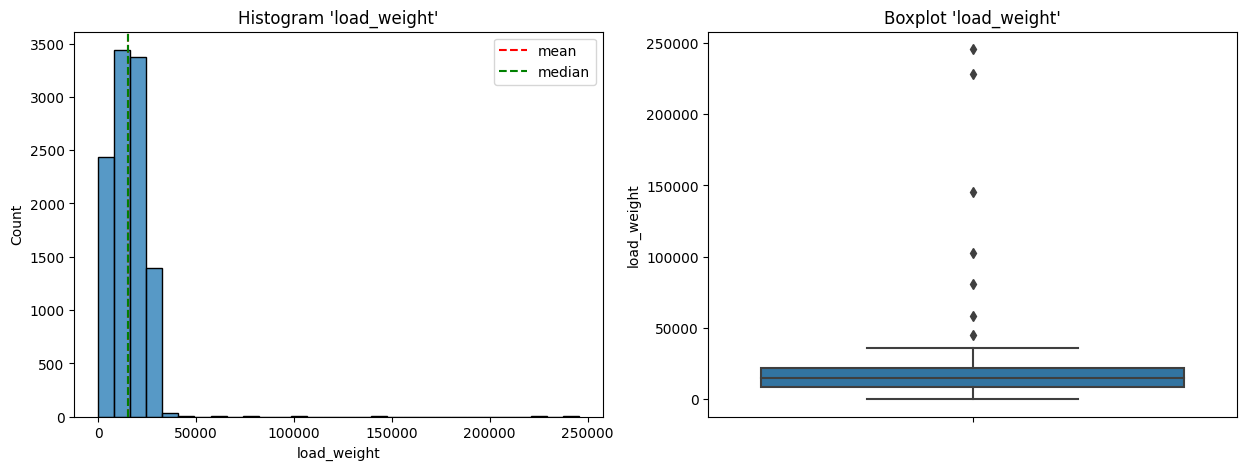

load_weight Kurtosis: 88.27555631574985
load_weight Skewness: 3.6973990393099316
Columns 'load_weight' right skewed


In [25]:
plot_dist(df_tds, df_col[3])

In [26]:
#see how many percentage of outliers
def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (3 * IQR)
    upper_bound = Q3 + (3 * IQR)
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print('Total Outliers: ', outliers.shape[0])
    print('Percentage of Outliers: ', round(outliers.shape[0] / df.shape[0] * 100, 2), '%')
    return outliers

In [27]:
outliers(df_tds, df_col[3])

Total Outliers:  5
Percentage of Outliers:  0.05 %


,report_date,load_time,load_type,load_weight,dropoff_site
5176,2021-02-09,2021-02-09 01:08:00 UTC,GARBAGE COLLECTIONS,102680.0,TDS LANDFILL
8680,2021-03-09,2021-03-09 01:30:00 UTC,GARBAGE COLLECTIONS,145160.0,TDS LANDFILL
20368,2021-05-26,2021-05-26 11:40:00 UTC,GARBAGE COLLECTIONS,80697.0,TDS LANDFILL
20553,2021-05-27,2021-05-27 11:33:00 UTC,GARBAGE COLLECTIONS,245540.0,TDS LANDFILL
23798,2021-06-21,2021-06-21 01:05:00 UTC,GARBAGE COLLECTIONS,227780.0,TDS LANDFILL


Berdasarkan data di atas dapat disimpulkan:
- Distribusi data mengalami postive skewed.
- IQR * 3, karena extreme skew.
- terdapat 5 outlier.
- jumlah outlier sebanyak 0,05%.

Sehingga dapat digunakan teknik tukey's rule.

In [28]:
#remove outliers from df_tds use tukey's rule
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (3 * IQR)
    upper_bound = Q3 + (3 * IQR)
    
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

In [29]:
df_tds_no_outliers = remove_outliers(df_tds, df_col[3])

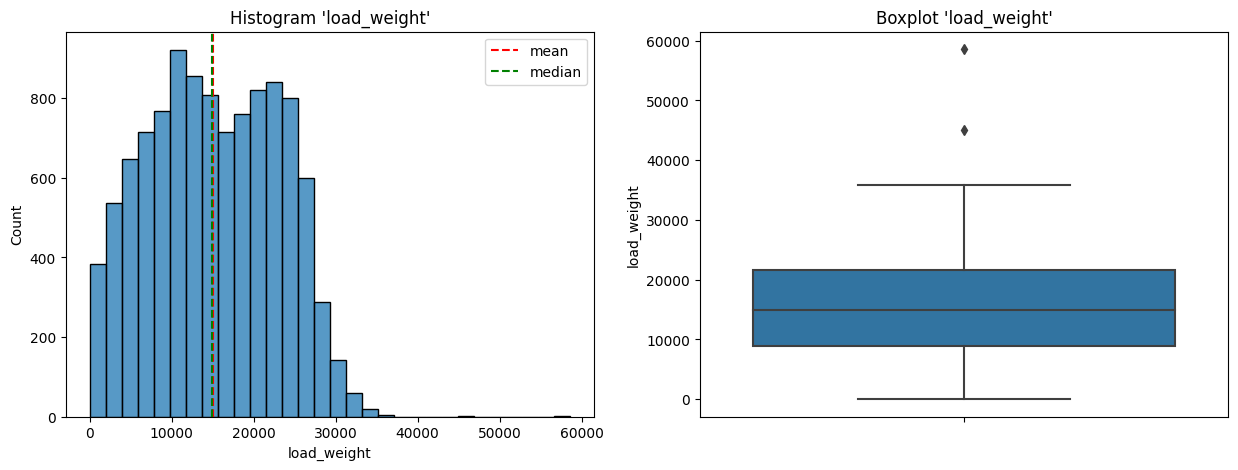

load_weight Kurtosis: -0.8825861158773747
load_weight Skewness: 0.037265139527453264
Columns 'load_weight' normal distribution


In [30]:
plot_dist(df_tds_no_outliers, df_col[3])

In [31]:
df_tds_no_outliers

,report_date,load_time,load_type,load_weight,dropoff_site
16,2021-01-02,2021-01-02 02:16:00 UTC,BULK,12480.0,TDS LANDFILL
17,2021-01-02,2021-01-02 12:25:00 UTC,BULK,10200.0,TDS LANDFILL
18,2021-01-02,2021-01-02 02:13:00 UTC,BULK,5440.0,TDS LANDFILL
19,2021-01-02,2021-01-02 04:27:00 UTC,DEAD ANIMAL,140.0,TDS LANDFILL
20,2021-01-02,2021-01-02 02:44:00 UTC,GARBAGE COLLECTIONS,24580.0,TDS LANDFILL
...,...,...,...,...,...
26097,2021-07-08,2021-07-08 02:04:00 UTC,GARBAGE COLLECTIONS,8380.0,TDS LANDFILL
26098,2021-07-08,2021-07-08 02:27:00 UTC,BULK,2100.0,TDS LANDFILL
26099,2021-07-08,2021-07-08 11:07:00 UTC,BULK,3500.0,TDS LANDFILL
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


Distribusi data telah menjadi normal

Bandingkan central tendency sebelum dan sesudah

In [32]:
#central tendency dropoff_site = TDS LANDFILL from df
df_tds_outlier = df[df['dropoff_site'] == 'TDS LANDFILL']
print('Before remove outliers')
print('Mean of load_weight: ', df_tds_outlier['load_weight'].mean())
print('Median of load_weight: ', df_tds_outlier['load_weight'].median())
print('Mode of load_weight:\n', df_tds_outlier['load_weight'].mode())
print("")
print('After remove outliers')
print('Mean of load_weight: ', df_tds_no_outliers['load_weight'].mean())
print('Median of load_weight: ', df_tds_no_outliers['load_weight'].median())
print('Mode of load_weight:\n', df_tds_no_outliers['load_weight'].mode())

Before remove outliers
Mean of load_weight:  15167.430760681202
Median of load_weight:  14920.0
Mode of load_weight:
 0       20.0
1       60.0
2    12020.0
Name: load_weight, dtype: float64

After remove outliers
Mean of load_weight:  15099.46410217188
Median of load_weight:  14920.0
Mode of load_weight:
 0       20.0
1       60.0
2    12020.0
Name: load_weight, dtype: float64


#### 6. Menghitung range, variance, dan standar deviasi untuk data load_weight.

In [33]:
#Calculate range of load_weight
print('Range of load_weight: ', df_tds_no_outliers['load_weight'].max() - df_tds_no_outliers['load_weight'].min())

#Calculate variance of load_weight
print('Variance of load_weight: ', df_tds_no_outliers['load_weight'].var())

#Calculate standard deviation of load_weight
print('Standard deviation of load_weight: ', df_tds_no_outliers['load_weight'].std())

Range of load_weight:  58600.0
Variance of load_weight:  61927509.6121629
Standard deviation of load_weight:  7869.403383495022


Dari data di atas dapat disimpulkan bahwa terdapat banyak perbedaan load weight yang signifikan. Kemungkinan jumlah sampah yang dibuang setiap harinya dan setiap jamnya berbeda - beda.

#### 7. Confidence Interval

In [34]:
#confidence interval of load weight
sample_mean = df['load_weight'].mean()
sample_std = df['load_weight'].std()

#confidence level = 95%
conf_level = 0.95

dfreedom = df['load_weight'].count() - 1

t_value = stats.t.ppf((1 + conf_level) / 2, dfreedom)

std_err = sample_std / np.sqrt(df['load_weight'].count())

margin_err = t_value * std_err

conf_interval = (sample_mean - margin_err, sample_mean + margin_err)

print('Sample mean:', sample_mean)
print('Standard deviation:', sample_std)
print('Confidence level:', conf_level)
print('Degrees of freedom:', dfreedom)
print('t-value:', t_value)
print('Standard error of the mean:', std_err)
print('Margin of error:', margin_err)
print('Confidence interval:', conf_interval)

Sample mean: 12206.729369142811
Standard deviation: 7049.01432423117
Confidence level: 0.95
Degrees of freedom: 25711
t-value: 1.9600562555918224
Standard error of the mean: 43.96028135992695
Margin of error: 86.16462447710141
Confidence interval: (12120.56474466571, 12292.893993619913)


- Data yang digunakan adalah keseluruhan site. Dikarenakan dapat memberikan perhitungan yang lebih akurat.
- Untuk membuat site baru, kapasitas harus lebih besar dari maksimal confidence interval. Untuk mengatasi jumlah sampah yang tiap tahunnya dimungkinkan dapat meningkat.

#### 8. Uji Hipotesis antara site 'TDS LANDFILL' dan 'ORGANICS BY GOSH'

Bersihkan terlebih dahulu dataset ORGANICS BY GOSH.

In [35]:
df_obg = df[df['dropoff_site'] == 'ORGANICS BY GOSH']
df_obg.head()

,report_date,load_time,load_type,load_weight,dropoff_site
75,2021-01-02,2021-01-04 07:37:00 UTC,ORGANICS,15800.0,ORGANICS BY GOSH
76,2021-01-02,2021-01-02 07:40:00 UTC,ORGANICS,20760.0,ORGANICS BY GOSH
77,2021-01-02,2021-01-02 04:46:00 UTC,ORGANICS,14450.0,ORGANICS BY GOSH
78,2021-01-02,2021-01-04 08:48:00 UTC,ORGANICS,5980.0,ORGANICS BY GOSH
79,2021-01-02,2021-01-02 01:30:00 UTC,ORGANICS,19540.0,ORGANICS BY GOSH


In [36]:
df_col = df_obg.columns.tolist()
df_col

['report_date', 'load_time', 'load_type', 'load_weight', 'dropoff_site']

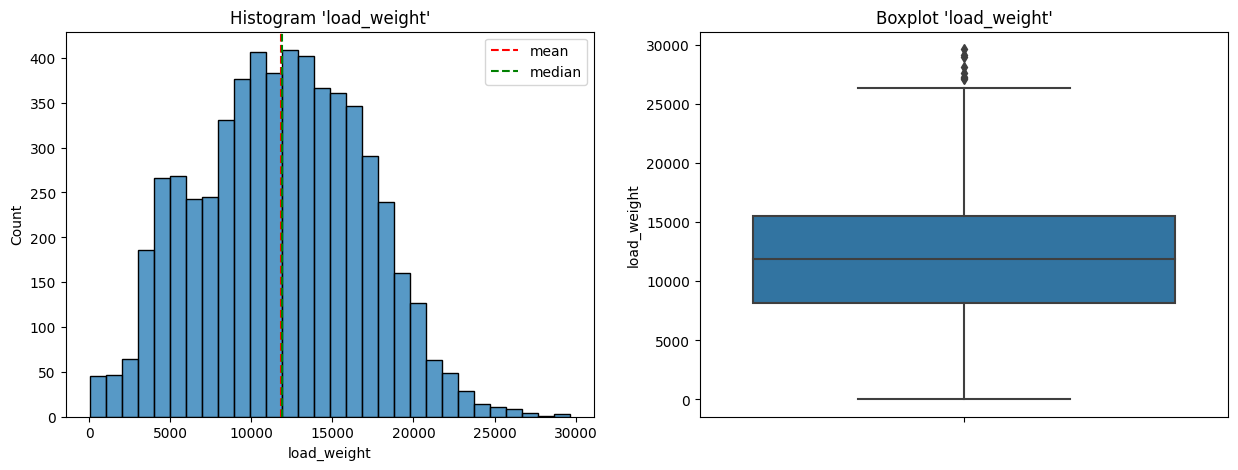

load_weight Kurtosis: -0.49456736895004516
load_weight Skewness: 0.05783661317421264
Columns 'load_weight' normal distribution


In [37]:
plot_dist(df_obg, df_col[3])

Data terdistribusi normal sehingga akan digunakan teknik Z-score

In [38]:
df_obg['Z-Score normal'] = stats.zscore(df_obg['load_weight'])

/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_74397/1083111932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obg['Z-Score normal'] = stats.zscore(df_obg['load_weight'])


In [39]:
df_obg_no_outliers = df_obg[(df_obg['Z-Score normal'] < 3) & (df_obg['Z-Score normal'] > -3)]
df_obg_no_outliers.head()

,report_date,load_time,load_type,load_weight,dropoff_site,Z-Score normal
75,2021-01-02,2021-01-04 07:37:00 UTC,ORGANICS,15800.0,ORGANICS BY GOSH,0.785296
76,2021-01-02,2021-01-02 07:40:00 UTC,ORGANICS,20760.0,ORGANICS BY GOSH,1.764660
77,2021-01-02,2021-01-02 04:46:00 UTC,ORGANICS,14450.0,ORGANICS BY GOSH,0.518735
78,2021-01-02,2021-01-04 08:48:00 UTC,ORGANICS,5980.0,ORGANICS BY GOSH,-1.153686
79,2021-01-02,2021-01-02 01:30:00 UTC,ORGANICS,19540.0,ORGANICS BY GOSH,1.523768


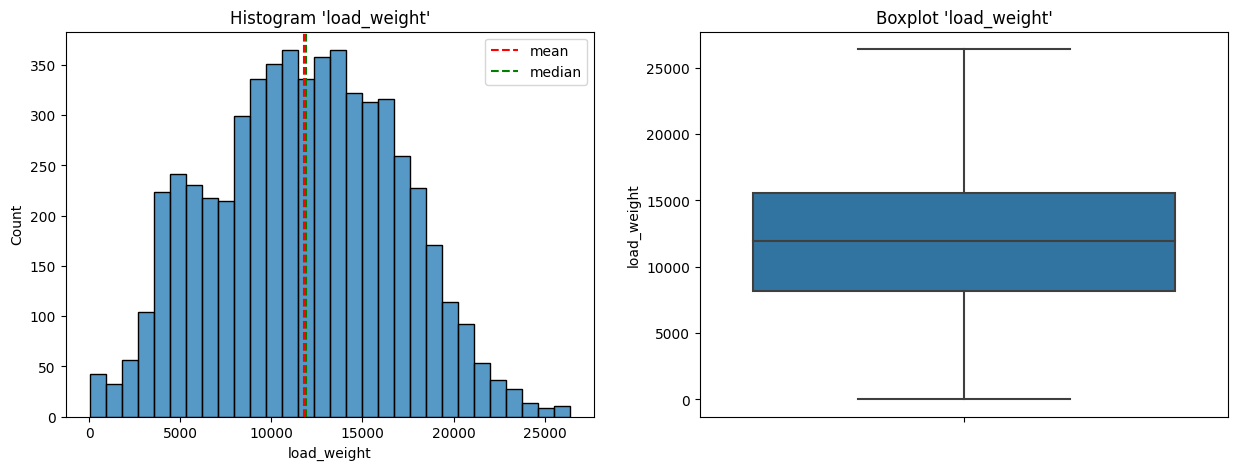

load_weight Kurtosis: -0.5812382959026685
load_weight Skewness: 0.02450630670256225
Columns 'load_weight' normal distribution


In [40]:
plot_dist(df_obg_no_outliers, df_col[3])

Mulai uji hipotesis <br>
Perbandingan rata-rata load_weight harian dari TDS Landfill sama dengan Organics by Gosh
- H0: μ_tds = μ_obg (Tidak ada perbedaan signifikan rata - rata load_weight harian antara TDS Landfill dan Organics by Gosh)
- H0: μ_tds != μ_obg (Terdapat perbedaan signifikan rata - rata load_weight harian antara TDS Landfill dan Organics by Gosh)

In [41]:
daily_TDS = df_tds_no_outliers[df_tds_no_outliers['dropoff_site'] == 'TDS LANDFILL'][['report_date', 'load_weight']].groupby('report_date').sum()
daily_OBS = df_obg_no_outliers[df_obg_no_outliers['dropoff_site'] == 'ORGANICS BY GOSH'][['report_date', 'load_weight']].groupby('report_date').sum()

In [42]:
daily_TDS.count()

load_weight    161
dtype: int64

In [43]:
df_tds_no_outliers['load_weight'].count()

10682

In [44]:
#Menggunakan Two Sample Two Tail Independent T-Test

#nilai confidence = 95%
#p-value = 1 - confidence
ttest, pval = stats.ttest_ind(daily_TDS, daily_OBS)
print('p-value:', pval[0])
if pval < 0.05:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

p-value: 1.8885031695299925e-26
Reject null hypothesis


/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_74397/3112664371.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tds, bins=100, color='blue', label='TDS Landfill')
/var/folders/96/h0mb68mj6bv5f5b950lyjxt80000gn/T/ipykernel_74397/3112664371.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

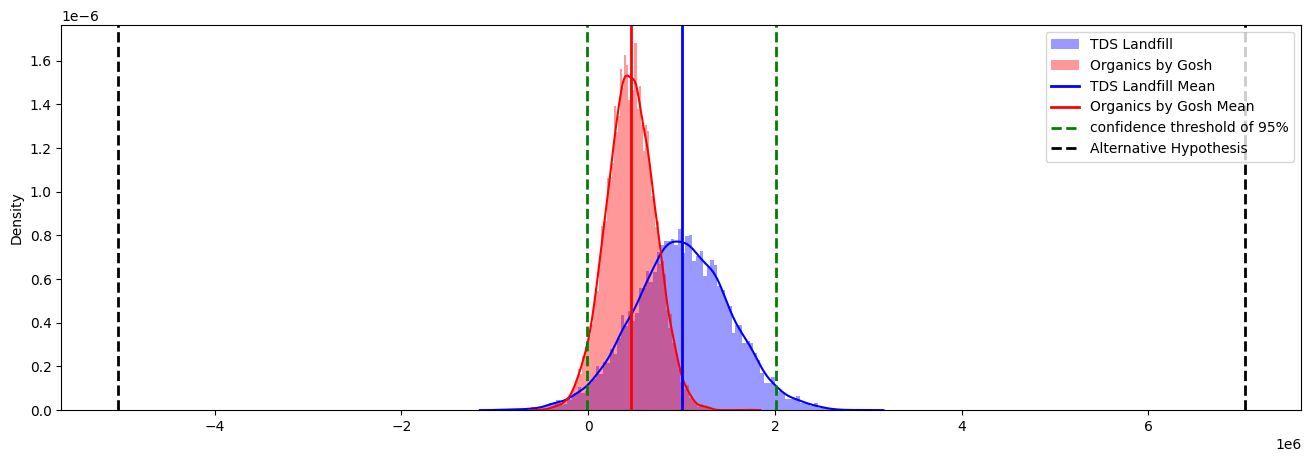

In [45]:
tds = np.random.normal(daily_TDS.load_weight.mean(), daily_TDS.load_weight.std(), 10000)
obs = np.random.normal(daily_OBS.load_weight.mean(), daily_OBS.load_weight.std(), 10000)

ci = stats.norm.interval(0.95, loc=daily_TDS.load_weight.mean(), scale=daily_TDS.load_weight.std())
plt.figure(figsize=(16,5))
sns.distplot(tds, bins=100, color='blue', label='TDS Landfill')
sns.distplot(obs, bins=100, color='red', label='Organics by Gosh')

plt.axvline(daily_TDS.load_weight.mean(), color='blue', linestyle='solid', linewidth=2, label='TDS Landfill Mean')
plt.axvline(daily_OBS.load_weight.mean(), color='red', linestyle='solid', linewidth=2, label='Organics by Gosh Mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(tds.mean()+ttest*tds.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(tds.mean()-ttest*tds.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

- Berdasarkan uji yang dilakukan diatas, dapat disimpulkan bahwa terdapat bukti perbedaan signifikan terhadap rata - rata site di TDS Landfill dan Organics by Gosh.

#### Pertanyaan Konsep

Question :
1. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!
2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?
3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?

Answer:
1. Untuk Site TDS Landfill menggunakan teknik tukey's rule dikarenakan data yang skew ke kanan. Sedangkan untuk Organic By Gosh menggunakan teknik Z-Score dikarenakan persebaran data yang normal.
2. Confidence interval digunakan untuk memperkirakan rentang nilai sebenarnya suatu populasi dari data sampel. Sehingga dapat digunakan untuk mengestimasikan kapasitas pembuatan site tempat sampah baru.
3. Uji hipotesis yang digunakan adalah Two Sample Independent Two Tail. Dikarenakan akan dibandingkan rata - rata harian dari dua site tempat sampah yang tidak saling berhubungan datanya.

### Problem 2

#### Load Data

In [46]:
#Query report_date and load_weight
df_2 = df[['report_date', 'load_weight']]
#Convert load_time to datetime
data_final = df_2.groupby('report_date').sum()
data_final

,load_weight
report_date,
2021-01-01,11300.0
2021-01-02,2181430.0
2021-01-04,2920260.0
2021-01-05,2399840.0
2021-01-06,2419150.0
...,...
2021-07-05,1897290.0
2021-07-06,1978140.0
2021-07-07,1620880.0


#### Perhitungan

In [47]:
#separate data into x and y
#x = jarak anatara data
x = range(len(data_final))
y = data_final.load_weight

In [48]:
#Menghitung turunan dari data menggunakan gradient
gradients = np.gradient(y, x)
v = gradients[-1]
print(v)

-1381910.0


In [49]:
#w pada tanggal 2021-07-09
w_today = data_final.load_weight[-1]
w_today

126140.0

In [50]:
#memperkirakan w pada tanggal 2021-07-10
w_tomorrow = w_today + v * 1
np.abs(w_tomorrow)

1255770.0

Question :
1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?
2.  kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!
3. Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?

Answer :
1. Metode yang digunakan adalah metode numerik.
2. tidak, karena sudah digunakan batuan dari library numpy untuk menghitung turunan numerik yaitu dengan method np.gradient().
3. Berdasarkan perhitungan diperkiraan sebanyak 1.255.770 Kg.

## Kesimpulan

- Pemerintah sebaiknya membuat site baru yang lebih besar dari nilai confidence interval.
- Pemerintah juga bisa menyalurkan sampah ke site sampah yang jarang digunakan untuk menampung sampah. Karena dari records setiap site, ada beberapa site yang hanya baru dipakai sekali.
- Perbandingan rata - rata harian site TDS Landfill dengan Organics By Gosh signifikan.
- Berdasarkan perhitungan diperkiraan sebanyak 1.255.770 Kg sampah akan dibuang pada tanggal 10 juli 2021.